# Problem 1: Tensorflow Random Walks

https://www.tensorflow.org/guide/random_numbers?hl=hr#setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 100

## Numpy Method

In [2]:
plot_num=1

In [3]:
n_walkers = 100
n_steps = 5000
t = np.arange(n_steps)

In [4]:
# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

### 1D

In [5]:
# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape_1d = (n_walkers,n_steps,1)
# These are the steps at each stage
steps_1d = np.random.choice(a=step_set, size=step_shape_1d)
# Now we add up the steps for each walker to get the x positions
x_1d = steps_1d.cumsum(axis=1)

# Now get the averages over the walkers
x2_1d = np.average( x_1d**2, axis=0 )
x4_1d = np.average( x_1d**4, axis=0 )
sigma2_nd_1d = np.sqrt( x4_1d - x2_1d**2 )
sigma2_1d = np.sum( sigma2_nd_1d, axis=1 )

Text(0, 0.5, 'x position')

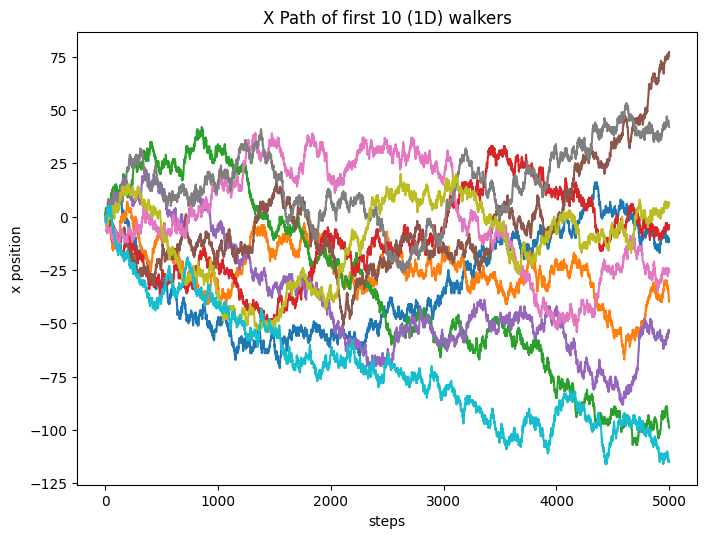

In [6]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_1d[i,:,0] )
plt.title("X Path of first 10 (1D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### 2D

In [7]:
step_shape_2d = (n_walkers,n_steps,2)
steps_2d = np.random.choice(a=step_set, size=step_shape_2d)
x_2d = steps_2d.cumsum(axis=1)

x2_2d = np.average( x_2d**2, axis=0 )
x4_2d = np.average( x_2d**4, axis=0 )
sigma2_nd_2d = np.sqrt( x4_2d - x2_2d**2 )
sigma2_2d = np.sum( sigma2_nd_2d, axis=1 )

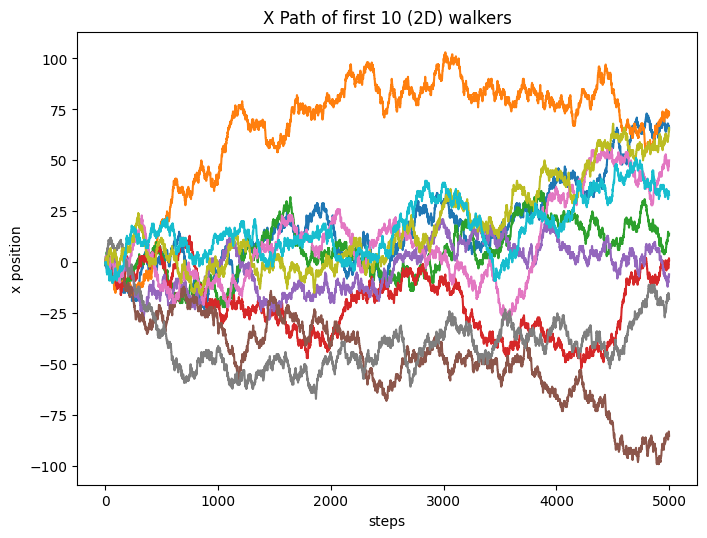

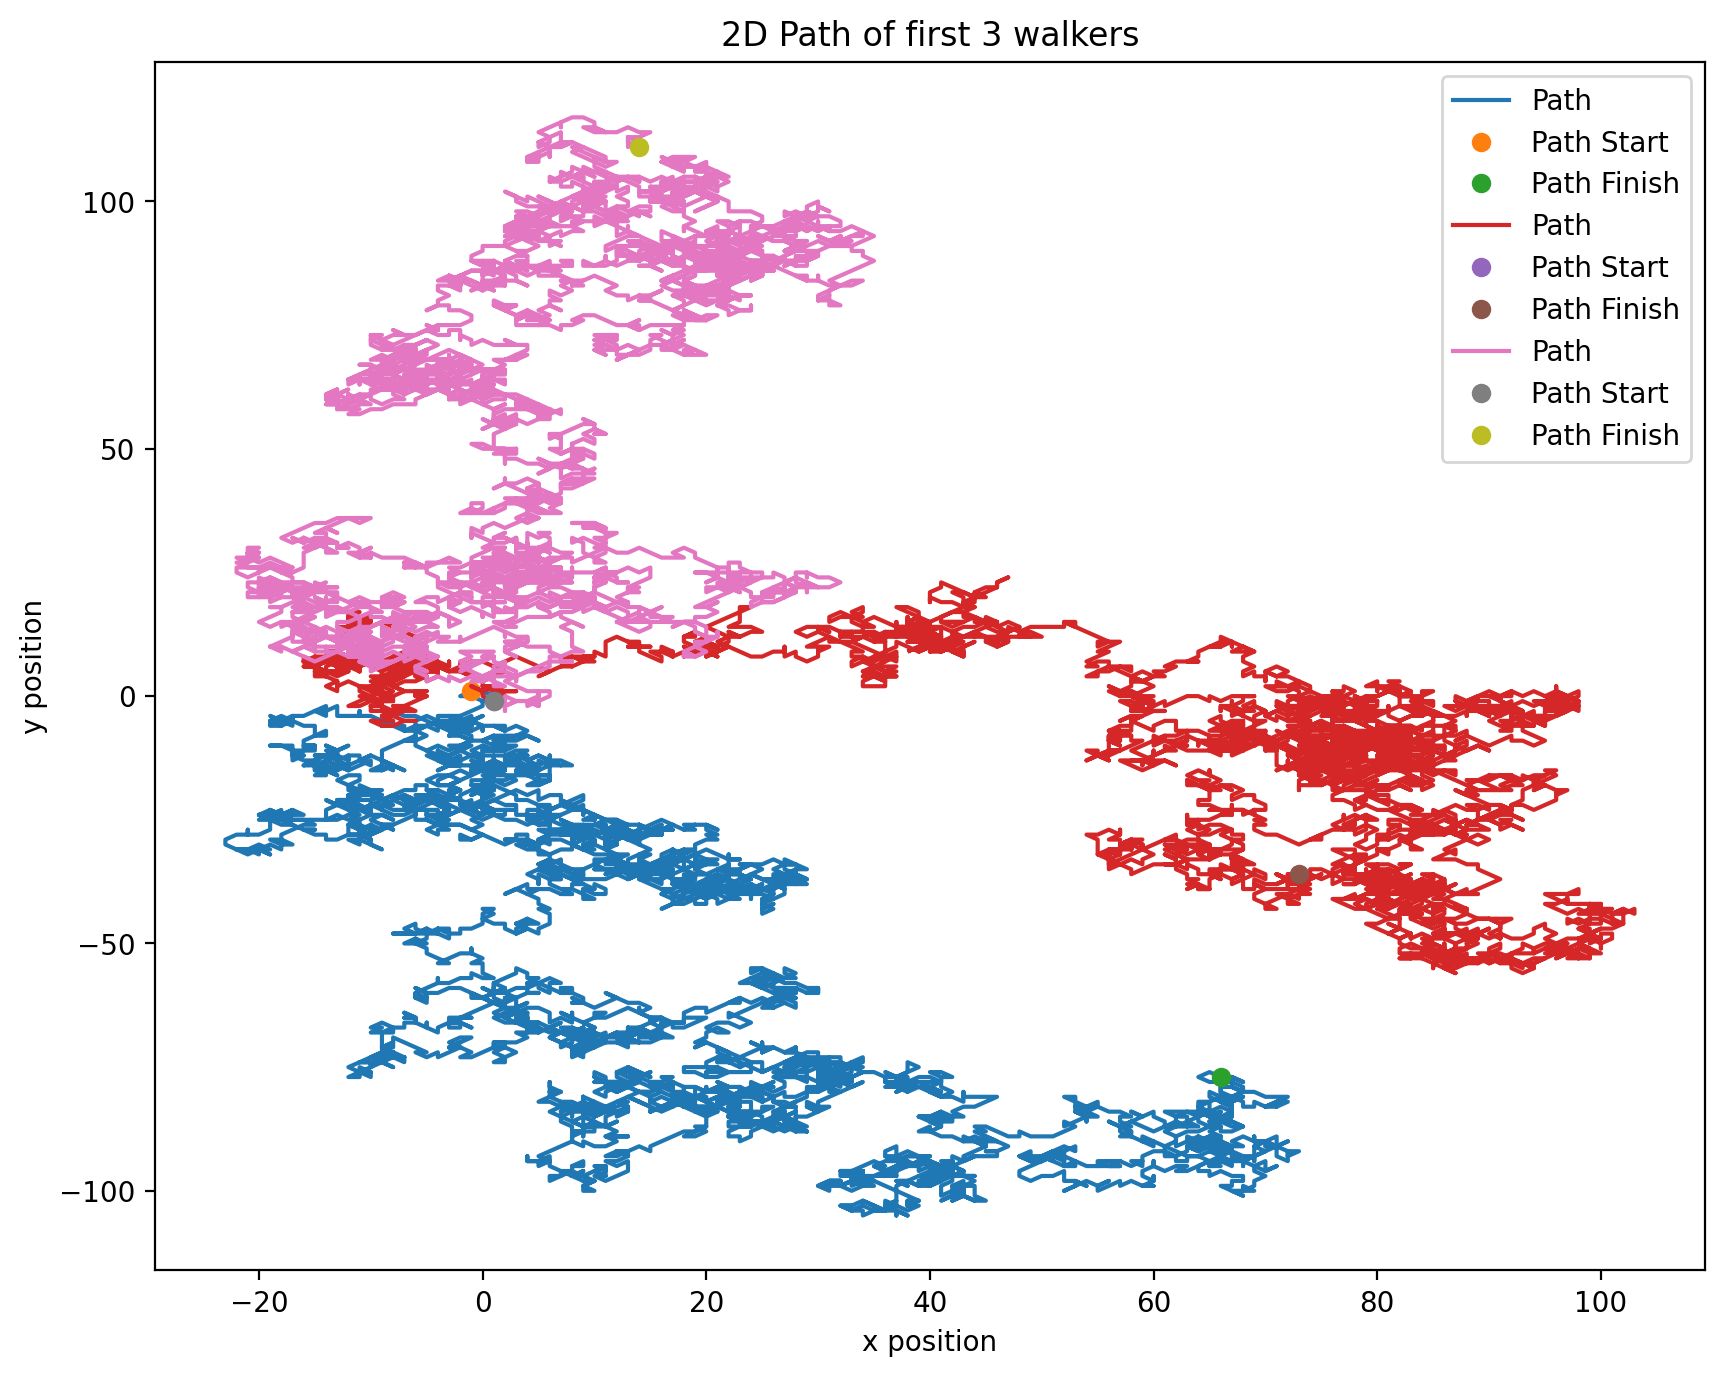

In [8]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_2d[i,:,0] )
plt.title("X Path of first 10 (2D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num, figsize=(10,8),dpi=200)
plot_num = plot_num + 1
for i in range( min(3,n_walkers) ):
    plt.plot( x_2d[i,:,0], x_2d[i,:,1], '-', label='Path' )
    plt.plot( x_2d[i,0,0], x_2d[i,0,1], 'o', label='Path Start' )
    plt.plot( x_2d[i,n_steps-1,0], x_2d[i,n_steps-1,1], 'o', label='Path Finish')
plt.title("2D Path of first 3 walkers")
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

### 3D

In [9]:
step_shape_3d = (n_walkers,n_steps,3)
steps_3d = np.random.choice(a=step_set, size=step_shape_3d)
x_3d = steps_3d.cumsum(axis=1)

x2_3d = np.average( x_3d**2, axis=0 )
x4_3d = np.average( x_3d**4, axis=0 )
sigma2_nd_3d = np.sqrt( x4_3d - x2_3d**2 )
sigma2_3d = np.sum( sigma2_nd_3d, axis=1 )

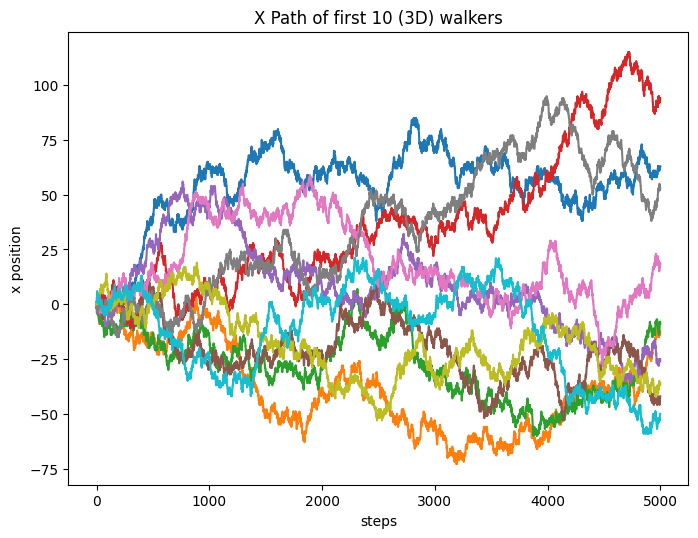

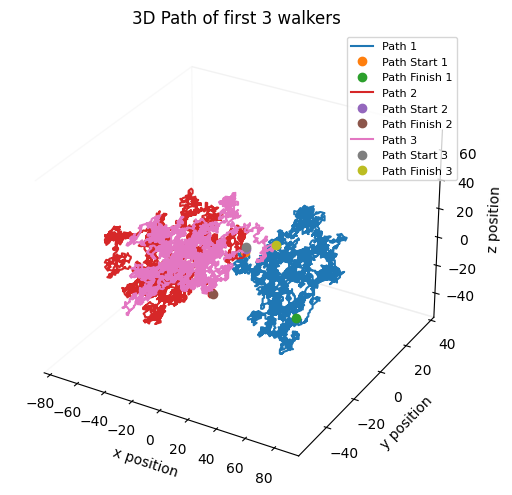

In [10]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers) ):
    plt.plot( x_3d[i,:,0] )
plt.title("X Path of first 10 (3D) walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1

ax = plt.axes(projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

ax.set_xlabel("x position")
ax.set_ylabel("y position")
ax.set_zlabel("z position")

for i in range( min(3,n_walkers) ):
    ax.plot3D( x_3d[i,:,0], x_3d[i,:,1], x_3d[i,:,2], '-', label='Path %d' % (i+1) )
    ax.plot3D( x_3d[i,0,0], x_3d[i,0,1], x_3d[i,0,2], 'o', label='Path Start %d' % (i+1) )
    ax.plot3D( x_3d[i,n_steps-1,0], x_3d[i,n_steps-1,1], x_3d[i,n_steps-1,2], 'o', label='Path Finish %d' % (i+1))
plt.title("3D Path of first 3 walkers")
plt.legend(fontsize=8)

### Statistical Plots

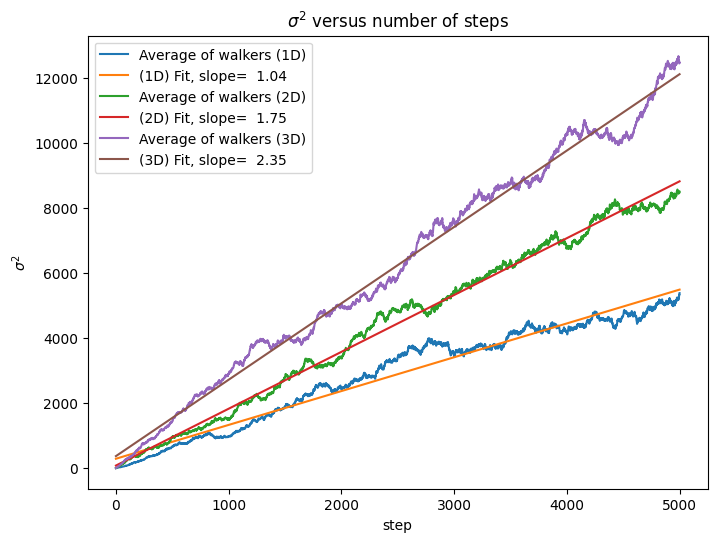

In [11]:
plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot( sigma2_1d,  label='Average of walkers (1D)' )
res_1d = np.polyfit(t, sigma2_1d,1 )
plt.plot( t, res_1d[0]*t + res_1d[1], label='(1D) Fit, slope=%6.2f' % res_1d[0] )

plt.plot( sigma2_2d,  label='Average of walkers (2D)' )
res_2d = np.polyfit(t, sigma2_2d,1 )
plt.plot( t, res_2d[0]*t + res_2d[1], label='(2D) Fit, slope=%6.2f' % res_2d[0] )

plt.plot( sigma2_3d,  label='Average of walkers (3D)' )
res_3d = np.polyfit(t, sigma2_3d,1 )
plt.plot( t, res_3d[0]*t + res_3d[1], label='(3D) Fit, slope=%6.2f' % res_3d[0] )


plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()

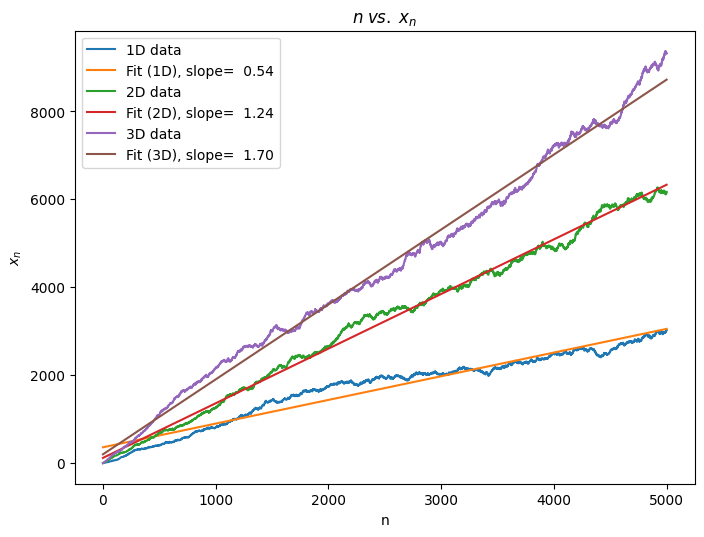

In [12]:
r2_1d = np.sum(x2_1d,1)
r2_2d = np.sum(x2_2d,1)
r2_3d = np.sum(x2_3d,1)

plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot(r2_1d, label='1D data')
fit_1d = np.polyfit(t, r2_1d,1 )
plt.plot( t, fit_1d[0]*t + fit_1d[1], label='Fit (1D), slope=%6.2f' % (fit_1d[0]) )

plt.plot(r2_2d, label='2D data')
fit_2d = np.polyfit(t, r2_2d,1 )
plt.plot( t, fit_2d[0]*t + fit_2d[1], label='Fit (2D), slope=%6.2f' % (fit_2d[0]) )

plt.plot(r2_3d, label='3D data')
fit_3d = np.polyfit(t, r2_3d,1 )
plt.plot( t, fit_3d[0]*t + fit_3d[1], label='Fit (3D), slope=%6.2f' % (fit_3d[0]) )

plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title("$n \; vs. \; x_n$")
plt.legend()

### Calculate Diffusion Coefficiants

In [13]:
D_numpy_1d = res_1d[0]/2
D_numpy_2d = res_2d[0]/4
D_numpy_3d = res_3d[0]/6

## Tensorflow Method

In [14]:
import tensorflow as tf

tf.random.set_seed(0)

In [15]:
n_walkers_tf = 100
n_steps_tf = 5000

t_tf = np.arange(n_steps_tf)

### 1D

In [16]:
step_shape_tf_1d = (n_walkers_tf, n_steps_tf, 1)
steps_tf_1d = tf.random.stateless_uniform(shape=step_shape_tf_1d, minval=-1,maxval=2, seed=(2,3) , dtype=tf.int32)
#steps_tf_1d = tf.random.uniform(shape=step_shape_tf_1d, minval=-1,maxval=2, seed=0 , dtype=tf.int32)
x_tf_1d = tf.math.cumsum(steps_tf_1d, axis=1)

# Now get the averages over the walkers
x2_tf_1d = tf.math.reduce_mean( x_tf_1d**2, axis=0 )
x4_tf_1d = tf.math.reduce_mean( x_tf_1d**4, axis=0 )

r2_tf_1d = x2_tf_1d[:,0]
r4_tf_1d = x4_tf_1d[:,0]

sigma2_nd_tf_1d = tf.math.sqrt( tf.cast(x4_tf_1d, dtype=tf.float32) - tf.cast(x2_tf_1d, dtype=tf.float32)**2 )
sigma2_tf_1d = tf.reduce_sum(sigma2_nd_tf_1d, axis=1 )

Text(0, 0.5, 'x position')

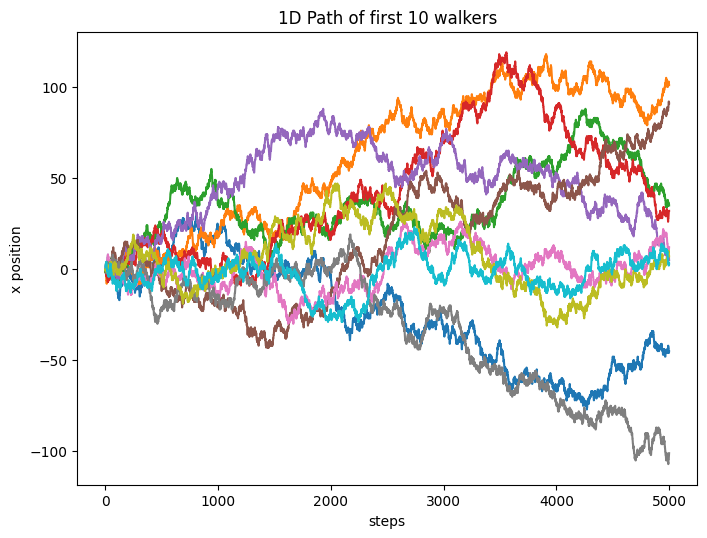

In [17]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_1d[i,:,0] )
plt.title("1D Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### 2D

In [18]:
step_shape_tf_2d = (n_walkers_tf, n_steps_tf, 2)
steps_tf_2d = tf.random.stateless_uniform(shape=step_shape_tf_2d, minval=-1,maxval=2, seed=(2,3), dtype=tf.int32)
#steps_tf_2d = tf.random.uniform(shape=step_shape_tf_2d, minval=-1,maxval=2, seed=0 , dtype=tf.int32)
x_tf_2d = tf.math.cumsum(steps_tf_2d, axis=1)

# Now get the averages over the walkers
x2_tf_2d = tf.math.reduce_mean( x_tf_2d**2, axis=0 )
x4_tf_2d = tf.math.reduce_mean( x_tf_2d**4, axis=0 )

r2_tf_2d = x2_tf_2d[:,0] + x2_tf_2d[:,1]
r4_tf_2d = x4_tf_2d[:,0] + x4_tf_2d[:,1]

sigma2_nd_tf_2d = tf.math.sqrt( tf.cast(x4_tf_2d, dtype=tf.float32) - tf.cast(x2_tf_2d, dtype=tf.float32)**2 )
sigma2_tf_2d = tf.math.reduce_sum(sigma2_nd_tf_2d, axis=1 )

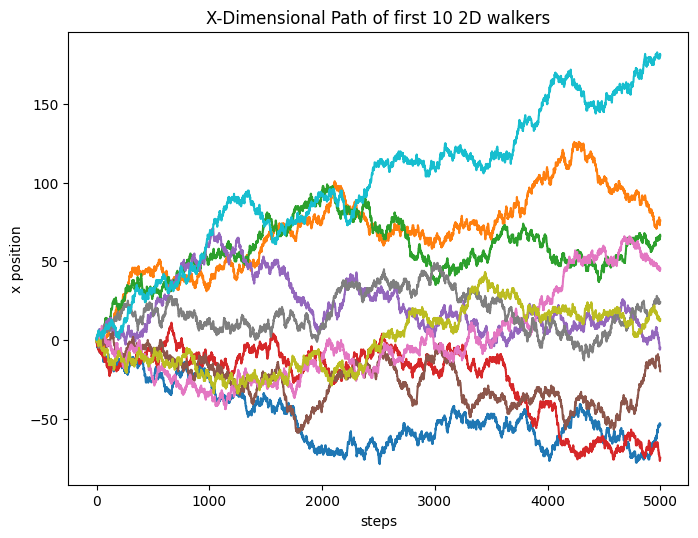

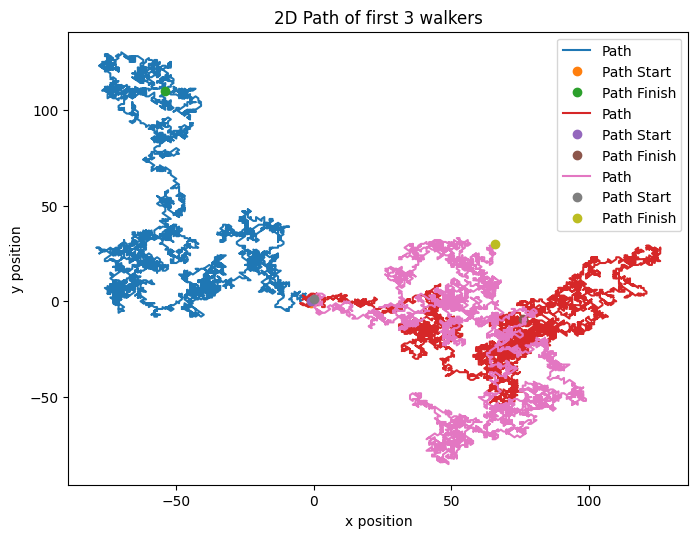

In [19]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0] )
plt.title("X-Dimensional Path of first 10 2D walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(3,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0], x_tf_2d[i,:,1], '-', label='Path' )
    plt.plot( x_tf_2d[i,0,0], x_tf_2d[i,0,1], 'o', label='Path Start' )
    plt.plot( x_tf_2d[i,n_steps-1,0], x_tf_2d[i,n_steps-1,1], 'o', label='Path Finish')
plt.title("2D Path of first 3 walkers")
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()

### 3D

In [20]:
step_shape_tf_3d = (n_walkers_tf, n_steps_tf, 3)
steps_tf_3d = tf.random.stateless_uniform(shape=step_shape_tf_3d, minval=-1,maxval=2, seed=(2,3), dtype=tf.int32)
#steps_tf_3d = tf.random.uniform(shape=step_shape_tf_3d, minval=-1,maxval=2, seed=0 , dtype=tf.int32)
x_tf_3d = tf.math.cumsum(steps_tf_3d, axis=1)

# Now get the averages over the walkers
x2_tf_3d = tf.math.reduce_mean( x_tf_3d**2, axis=0 )
x4_tf_3d = tf.math.reduce_mean( x_tf_3d**4, axis=0 )

r2_tf_3d = x2_tf_3d[:,0] + x2_tf_3d[:,1] + x2_tf_3d[:,2]
r4_tf_3d = x4_tf_3d[:,0] + x4_tf_3d[:,1] + x2_tf_3d[:,2]

sigma2_nd_tf_3d = tf.math.sqrt( tf.cast(x4_tf_3d, dtype=tf.float32) - tf.cast(x2_tf_3d, dtype=tf.float32)**2 )
sigma2_tf_3d = tf.math.reduce_sum(sigma2_nd_tf_3d, axis=1 )

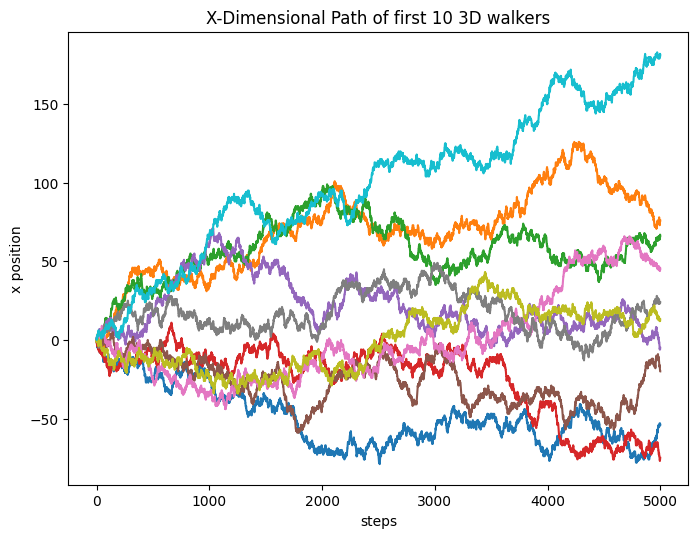

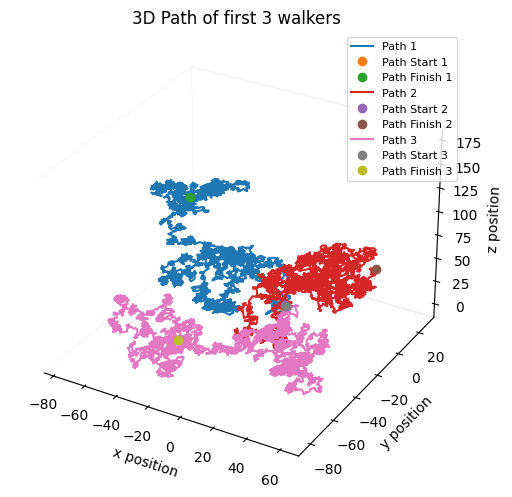

In [21]:
plt.figure(plot_num)
plot_num = plot_num + 1
for i in range( min(10,n_walkers_tf) ):
    plt.plot( x_tf_2d[i,:,0] )
plt.title("X-Dimensional Path of first 10 3D walkers")
plt.xlabel("steps")
plt.ylabel("x position")

plt.figure(plot_num)
plot_num = plot_num + 1

ax = plt.axes(projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

ax.set_xlabel("x position")
ax.set_ylabel("y position")
ax.set_zlabel("z position")

for i in range( min(3,n_walkers_tf) ):
    ax.plot3D( x_tf_3d[i,:,0], x_tf_3d[i,:,1], x_tf_3d[i,:,2], '-', label='Path %d' % (i+1) )
    ax.plot3D( x_tf_3d[i,0,0], x_tf_3d[i,0,1], x_tf_3d[i,0,2], 'o', label='Path Start %d' % (i+1) )
    ax.plot3D( x_tf_3d[i,n_steps-1,0], x_tf_3d[i,n_steps-1,1], x_tf_3d[i,n_steps-1,2], 'o', label='Path Finish %d' % (i+1))
plt.title("3D Path of first 3 walkers")
plt.legend(fontsize=8)


### Plot Statistics

*From Random Walkers notebook:*
Each walker has position

$$
x_n = \sum_{i=1}^n s_i
$$

where $s_i$ is each walkers' step from the `steps` construct above. The average of $s_i$ is zero because they are uniformly chosen from $(-1,0,1)$. However, the standard deviation for each walker is

$$
\left< x_n^2 \right> = \left< \sum_{i=1}^{n} \sum_{j=1}^{n} s_i s_j \right>
$$

$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

If there are $m$ walkers each walking $n$ steps, and the index $k$ iterates over the walkers, then at each step $n$ we have ensemble averages (in 1 dimension):

$$
\left< x_n^4 \right> = \sum_{k=1}^m \frac{x_{k,n}^4}{m}
$$

$$
\left< x_n^2 \right> = \sum_{k=1}^m \frac{x_{k,n}^2}{m}
$$

The overall diffusion width at the $n$th step, taking these ensemble averages, is therefore

$$
\sigma^2_n = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 }
$$

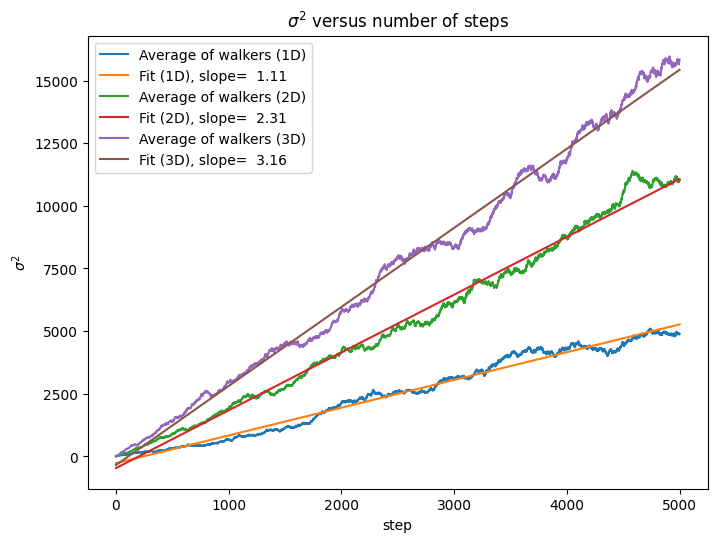

In [22]:
plt.figure(plot_num)
plot_num = plot_num + 1

plt.plot( sigma2_tf_1d,  label='Average of walkers (1D)' )
res_1d = np.polyfit(t_tf, sigma2_tf_1d,1 )
plt.plot( t_tf, res_1d[0]*t_tf + res_1d[1], label='Fit (1D), slope=%6.2f' % res_1d[0] )

plt.plot( sigma2_tf_2d,  label='Average of walkers (2D)' )
res_2d = np.polyfit(t_tf, sigma2_tf_2d,1 )
plt.plot( t_tf, res_2d[0]*t_tf + res_2d[1], label='Fit (2D), slope=%6.2f' % res_2d[0] )

plt.plot( sigma2_tf_3d,  label='Average of walkers (3D)' )
res_3d = np.polyfit(t_tf, sigma2_tf_3d,1 )
plt.plot( t_tf, res_3d[0]*t_tf + res_3d[1], label='Fit (3D), slope=%6.2f' % res_3d[0] )


plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()

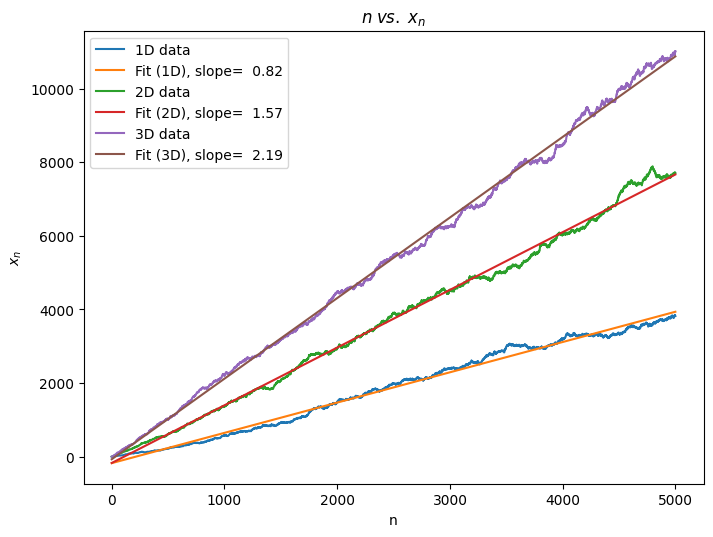

In [23]:
plt.figure(plot_num)
plot_num = plot_num + 1
plt.plot(x2_tf_1d, label='1D data')
fit_1d = np.polyfit(t_tf, x2_tf_1d,1 )
plt.plot( t_tf, fit_1d[0]*t_tf + fit_1d[1], label='Fit (1D), slope=%6.2f' % fit_1d[0] )

plt.plot(r2_tf_2d, label='2D data')
fit_2d = np.polyfit(t_tf, r2_tf_2d,1 )
plt.plot( t_tf, fit_2d[0]*t_tf + fit_2d[1], label='Fit (2D), slope=%6.2f' % fit_2d[0] )

plt.plot(r2_tf_3d, label='3D data')
fit_3d = np.polyfit(t_tf, r2_tf_3d,1 )
plt.plot( t_tf, fit_3d[0]*t_tf + fit_3d[1], label='Fit (3D), slope=%6.2f' % fit_3d[0] )

plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title("$n \; vs. \; x_n$")
plt.legend()

### Calculate Diffusion Coefficients

In [24]:
D_tf_1d = res_1d[0]/2
D_tf_2d = res_2d[0]/4
D_tf_3d = res_3d[0]/6

In [46]:
err_tf_1d = abs((D_tf_1d - 0.5)/0.5)
err_tf_2d = abs((D_tf_2d - 0.5)/0.5)
err_tf_3d = abs((D_tf_3d - 0.5)/0.5)

err_np_1d = abs((D_numpy_1d - 0.5)/0.5)
err_np_2d = abs((D_numpy_2d - 0.5)/0.5)
err_np_3d = abs((D_numpy_3d - 0.5)/0.5)


err_tf = (err_tf_1d+err_tf_1d+err_tf_3d)/3
err_np = (err_np_1d+err_np_1d+err_np_3d)/3

In [53]:
print("dim\t||\tNumpy\t|\tError\t||\tTensorflow\t|\tError")
print("____________________________________________________________________________________")
print("1D \t||\t%0.3f\t|\t%0.3f\t||\t%0.3f\t\t|\t%0.3f\t" % (D_numpy_1d, err_np_1d, D_tf_1d, err_tf_1d))
print("2D \t||\t%0.3f\t|\t%0.3f\t||\t%0.3f\t\t|\t%0.3f\t" % (D_numpy_2d, err_np_2d, D_tf_2d, err_tf_2d))
print("3D \t||\t%0.3f\t|\t%0.3f\t||\t%0.3f\t\t|\t%0.3f\t" % (D_numpy_3d, err_np_3d, D_tf_3d, err_tf_3d))
print("\t\t      avg. err: %0.3f\t\t\t      avg. err: %0.3f" % (err_np, err_tf))

dim	||	Numpy	|	Error	||	Tensorflow	|	Error
____________________________________________________________________________________
1D 	||	0.520	|	0.040	||	0.554		|	0.108	
2D 	||	0.437	|	0.126	||	0.577		|	0.154	
3D 	||	0.391	|	0.217	||	0.526		|	0.052	
		      avg. err: 0.099			      avg. err: 0.089


### Comments

We expect the value of the diffusion coefficient to be $\frac{1}{2}$.  On average, the error for the tensorflow method is lower than the numpy method.